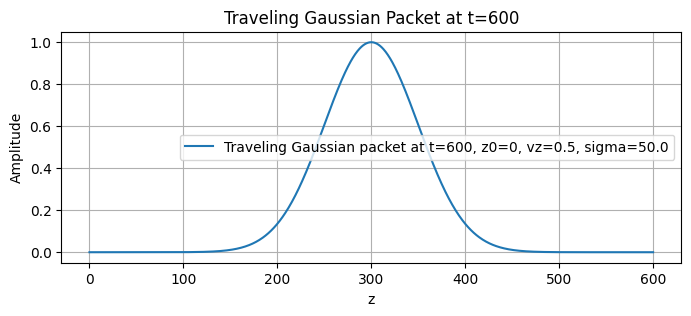

In [2]:
### Traveling Gaussian packet

import numpy as np
import matplotlib.pyplot as plt

# Parameters
z = np.linspace(0, 600, 1000)  # z 的範圍和分辨率
t = 600  # 時間 t = 600
z0 = 0  # 初始中心位置
vz = 0.5  # 速度
sigma = 50.0  # 標準差，影響高斯分佈的寬度

# Gaussian profile
f = np.exp(-(z - z0 - vz*t)**2 / (2 * sigma**2))

# Plot
plt.figure(figsize=(8, 3))
plt.plot(z, f, label=f'Traveling Gaussian packet at t={t}, z0={z0}, vz={vz}, sigma={sigma}')
plt.title('Traveling Gaussian Packet at t=600')
plt.xlabel('z')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()


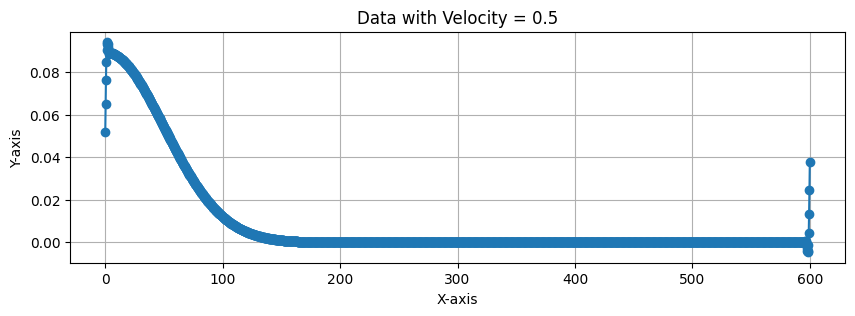

In [129]:
import numpy as np
import matplotlib.pyplot as plt

# 文件路径
file_path = '/Users/jameswu/Desktop/COSEnu/output_from_fd2/2000_2_0.2/1_rho_9900.dat'

# 读取.dat文件
data = np.loadtxt(file_path)

# 提取速度为0.5的数据
velocity_column = 1  # 假设速度在第二列
filtered_data = data[data[:, velocity_column] == 0.5]

# 假设我们要绘制第一列和第三列的数据
x = filtered_data[:, 0]  # 第一列数据作为x轴
y = filtered_data[:, 2]  # 第三列数据作为y轴

# 绘制图表
plt.figure(figsize=(10, 3))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Data with Velocity = 0.5')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

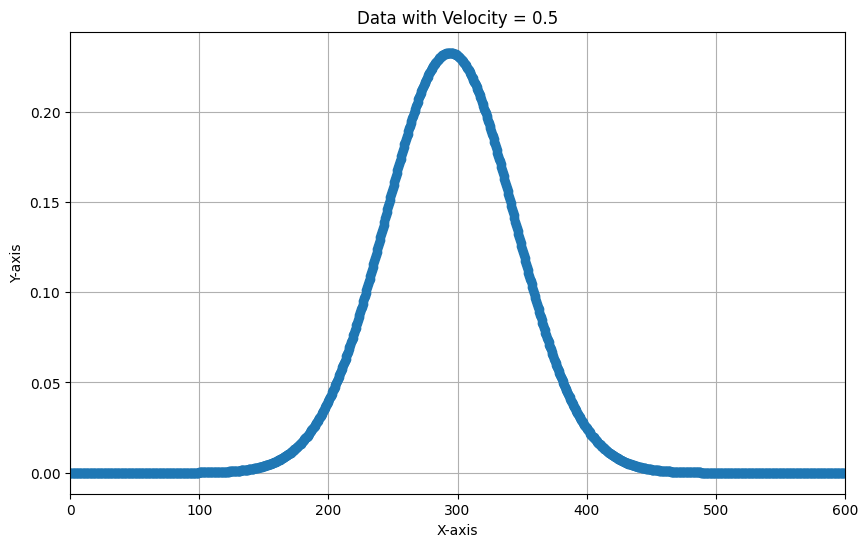

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# 文件路径
file_path = '/Users/jameswu/Desktop/COSEnu/output_from_fv1/2000_2_0.2/1_rho_4900.dat'

# 读取.dat文件
data = np.loadtxt(file_path)

# 提取速度为0.5的数据
velocity_column = 1  # 假设速度在第二列
filtered_data = data[data[:, velocity_column] == 0.5]

# 假设我们要绘制第一列和第三列的数据
x = filtered_data[:, 0]  # 第一列数据作为x轴
y = filtered_data[:, 2]  # 第三列数据作为y轴

# 绘制图表
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Data with Velocity = 0.5')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.xlim(0, 600)  # 限制x轴范围在0到600之间
plt.grid(True)
plt.show()


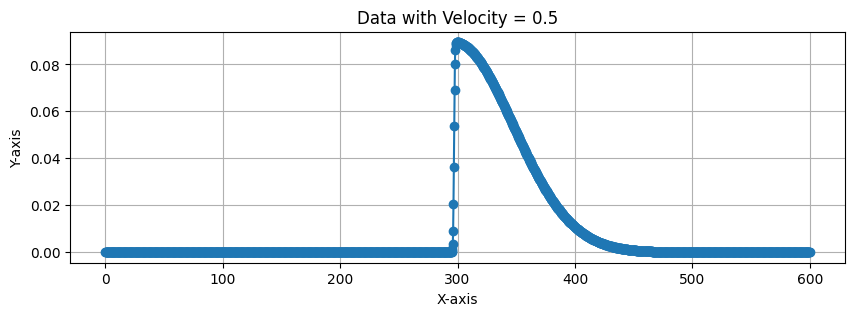

In [179]:
### for fd3 

import numpy as np
import matplotlib.pyplot as plt

# 文件路径
file_path = '/Users/jameswu/Desktop/COSEnu/output_from_fv2/2000_2_0.2/1_rho_9900.dat'

# 读取.dat文件
data = np.loadtxt(file_path)

# 提取速度为0.5的数据
velocity_column = 1  # 假设速度在第二列
filtered_data = data[data[:, velocity_column] == 0.5]

# 假设我们要绘制第一列和第三列的数据
x = filtered_data[:, 0]  # 第一列数据作为x轴
y = filtered_data[:, 2]  # 第三列数据作为y轴

# 绘制图表
plt.figure(figsize=(10, 3))
plt.plot(x, y, marker='o', linestyle='-')
plt.title('Data with Velocity = 0.5')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

In [146]:
### 計算E_2 ###

import numpy as np
from scipy import integrate, interpolate

def load_sim_data(filename):
    # 讀取 .dat 檔案
    data = np.loadtxt(filename)
    z_sim = data[:, 0]  # 假設第一列是 z 值
    f_sim = data[:, 1]  # 假設第二列是 f_sim 值
    return z_sim, f_sim

def calculate_E2(L, fExact, sim_file, z_min, z_max, num_points=1000):
    # 讀取模擬數據
    z_sim, f_sim_data = load_sim_data(sim_file)
    
    # 創建 f_sim 的插值函數
    f_sim_interp = interpolate.interp1d(z_sim, f_sim_data, kind='linear', fill_value='extrapolate')
    
    def epsilon(z):
        return fExact(z) - f_sim_interp(z)
    
    def integrand(z):
        return epsilon(z)**2
    
    integral_result, _ = integrate.quad(integrand, z_min, z_max)
    
    E2 = np.sqrt(integral_result / L)
    return E2

# 使用範例：
# L = 空間域的長度
# fExact 是代表精確結果的函數
# sim_file 是 .dat 檔案的路徑
# z_min 和 z_max 定義積分範圍

# E2 = calculate_E2(L, fExact, "path_to_your_sim_file.dat", z_min, z_max)

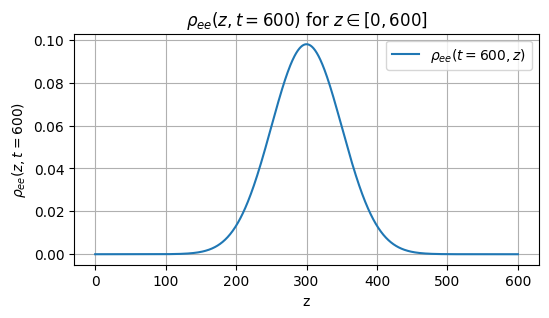

In [159]:
### exact solution for (17a)

import numpy as np
import matplotlib.pyplot as plt

# Given parameters
v = 0.5
t = 600
t0 = 0
theta_vac = 37 * np.pi / 180  # convert to radians
omega_vac = 0.1
sigma = 50

# Define the initial electron density distribution (Gaussian profile)
def rho_ee_t0(z):
    return np.exp(-z**2 / (2 * sigma**2))

# Define the final expression for rho_ee
def rho_ee(t, z):
    z_shifted = z - v * (t - t0)
    rho_initial = rho_ee_t0(z_shifted)
    oscillation_term = 1 - np.sin(2 * theta_vac)**2 * np.sin((omega_vac * (t - t0)) / 2)**2
    return rho_initial * oscillation_term

def rho_xx(t,z):
    z_shifted = z - v * (t - t0)
    rho_initial = rho_ee_t0(z_shifted)
    oscillation_term = np.sin(2 * theta_vac)**2 * np.sin((omega_vac * (t - t0)) / 2)**2
    return rho_initial * oscillation_term

def re_rho_ex(t,z):
    z_shifted = z - v * (t - t0)
    rho_initial = rho_ee_t0(z_shifted)
    oscillation_term = np.sin(2 * theta_vac) * np.cos(2 * theta_vac) * np.sin((omega_vac * (t - t0)) / 2)
    return rho_initial * oscillation_term

def im_rho_ex(t,z):
    z_shifted = z - v * (t - t0)
    rho_initial = rho_ee_t0(z_shifted)
    oscillation_term = 0.5 * np.sin(2 * theta_vac) * np.sin((omega_vac * (t - t0)))
    return rho_initial * oscillation_term


# Calculate rho_ee for z in the range 0 to 600
z_values = np.linspace(0, 600, 1000)
rho_ee_values = rho_ee(t, z_values)

# Plot the results
plt.figure(figsize=(6, 3))
plt.plot(z_values, rho_ee_values, label=r'$\rho_{ee}(t=600, z)$')
plt.xlabel('z')
plt.ylabel(r'$\rho_{ee}(z,t=600)$')
plt.title(r'$\rho_{ee}(z,t=600)$ for $z \in [0, 600]$')
plt.legend()
plt.grid(True)
plt.show()


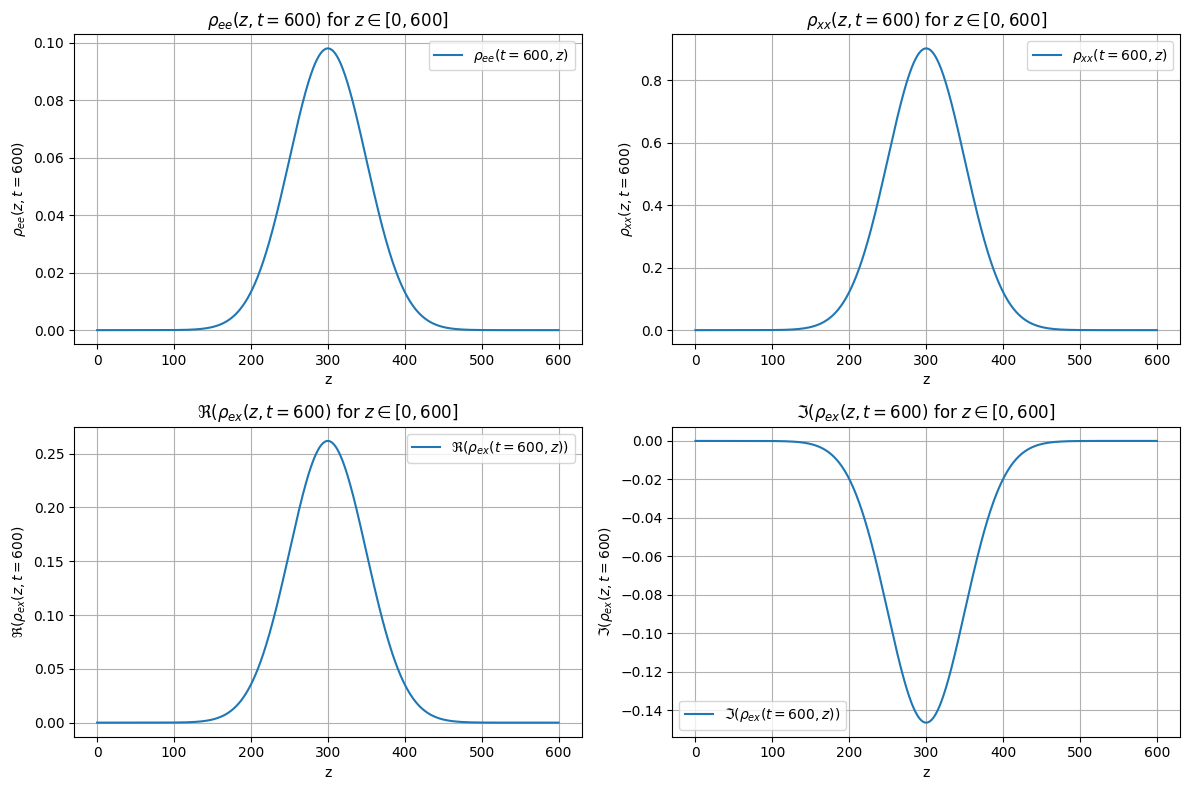

In [180]:
###exact soiution for 17(a~d) 

import numpy as np
import matplotlib.pyplot as plt

# Given parameters
v = 0.5
t = 600
t0 = 0
theta_vac = 37 * np.pi / 180  # convert to radians
omega_vac = 0.1
sigma = 50

# Define the initial electron density distribution (Gaussian profile)
def rho_ee_t0(z):
    return np.exp(-z**2 / (2 * sigma**2))

# Define the final expression for rho_ee
def rho_ee(t, z):
    z_shifted = z - v * (t - t0)
    rho_initial = rho_ee_t0(z_shifted)
    oscillation_term = 1 - np.sin(2 * theta_vac)**2 * np.sin((omega_vac * (t - t0)) / 2)**2
    return rho_initial * oscillation_term

def rho_xx(t,z):
    z_shifted = z - v * (t - t0)
    rho_initial = rho_ee_t0(z_shifted)
    oscillation_term = np.sin(2 * theta_vac)**2 * np.sin((omega_vac * (t - t0)) / 2)**2
    return rho_initial * oscillation_term

def rho_p(t, z):
    return rho_xx(t,z) + rho_ee(t,z)

def re_rho_ex(t,z):
    z_shifted = z - v * (t - t0)
    rho_initial = rho_ee_t0(z_shifted)
    oscillation_term = np.sin(2 * theta_vac) * np.cos(2 * theta_vac) * np.sin((omega_vac * (t - t0)) / 2)
    return -rho_initial * oscillation_term

def im_rho_ex(t,z):
    z_shifted = z - v * (t - t0)
    rho_initial = rho_ee_t0(z_shifted)
    oscillation_term = 0.5 * np.sin(2 * theta_vac) * np.sin((omega_vac * (t - t0)))
    return rho_initial * oscillation_term

# Calculate values for z in the range 0 to 600
z_values = np.linspace(0, 600, 1000)
rho_ee_values = rho_ee(t, z_values)
rho_xx_values = rho_xx(t, z_values)
re_rho_ex_values = re_rho_ex(t, z_values)
im_rho_ex_values = im_rho_ex(t, z_values)


# Plot the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(z_values, rho_ee_values, label=r'$\rho_{ee}(t=600, z)$')
plt.xlabel('z')
plt.ylabel(r'$\rho_{ee}(z,t=600)$')
plt.title(r'$\rho_{ee}(z,t=600)$ for $z \in [0, 600]$')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(z_values, rho_xx_values, label=r'$\rho_{xx}(t=600, z)$')
plt.xlabel('z')
plt.ylabel(r'$\rho_{xx}(z,t=600)$')
plt.title(r'$\rho_{xx}(z,t=600)$ for $z \in [0, 600]$')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(z_values, re_rho_ex_values, label=r'$\Re(\rho_{ex}(t=600, z))$')
plt.xlabel('z')
plt.ylabel(r'$\Re(\rho_{ex}(z,t=600)$')
plt.title(r'$\Re(\rho_{ex}(z,t=600)$ for $z \in [0, 600]$')
plt.legend()
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(z_values, im_rho_ex_values, label=r'$\Im(\rho_{ex}(t=600, z))$')
plt.xlabel('z')
plt.ylabel(r'$\Im(\rho_{ex}(z,t=600)$')
plt.title(r'$\Im(\rho_{ex}(z,t=600)$ for $z \in [0, 600]$')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


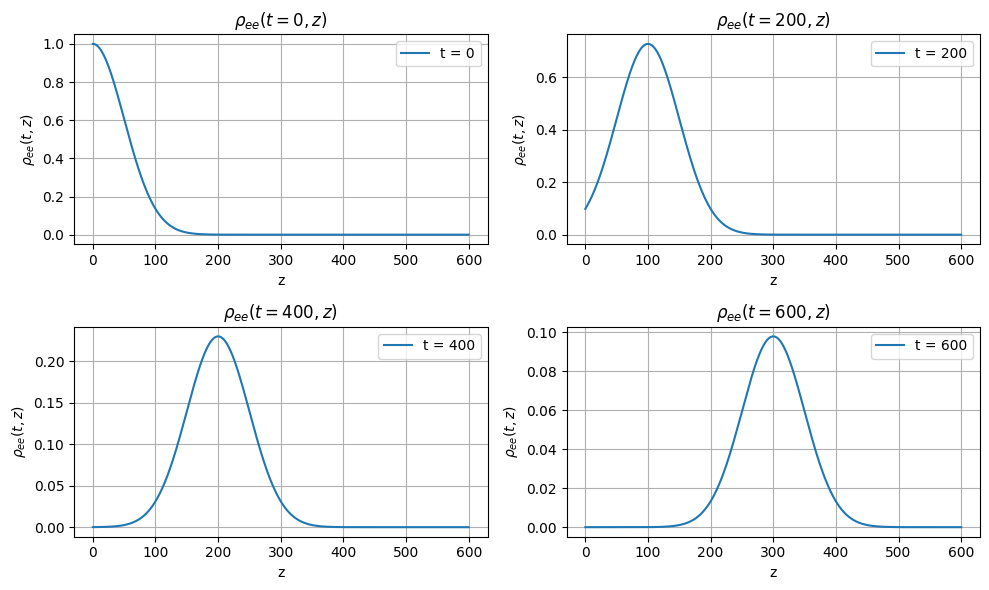

In [160]:
### time evolution for gaussian wave packet

# Define a function to plot rho_ee for a given time t
def plot_rho_ee_for_time(t, ax):
    rho_ee_values = rho_ee(t, z_values)
    ax.plot(z_values, rho_ee_values, label=f't = {t}')
    ax.set_xlabel('z')
    ax.set_ylabel(r'$\rho_{ee}(t, z)$')
    ax.set_title(r'$\rho_{ee}(t=' + str(t) + ', z)$')
    ax.legend()
    ax.grid(True)

# Define the time points we want to plot
time_points = [0, 200, 400, 600]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 6))

# Plot for each time point
for t, ax in zip(time_points, axs.flatten()):
    plot_rho_ee_for_time(t, ax)

# Adjust layout
plt.tight_layout()
plt.show()


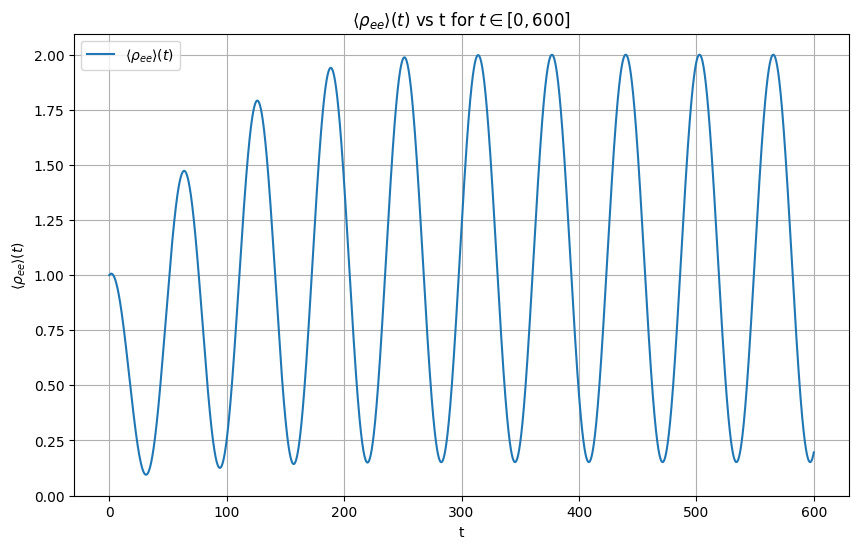

In [182]:
import numpy as np
import matplotlib.pyplot as plt

# Given parameters
v = 0.5
theta_vac = 37 * np.pi / 180  # convert to radians
omega_vac = 0.1
sigma = 50

# Define the initial electron density distribution (Gaussian profile)
def rho_ee_t0(x):
    return np.exp(-x**2 / (2 * sigma**2))

# Define the final expression for rho_ee
def rho_ee(t, z):
    z_shifted = z - v * (t)
    rho_initial = rho_ee_t0(z_shifted)
    oscillation_term = 1 - np.sin(2 * theta_vac)**2 * np.sin((omega_vac * t) / 2)**2
    return rho_initial * oscillation_term

# Define the range for t and z
t_values = np.linspace(0, 600, 10000)
z_values = np.linspace(0, 600, 1000)
z_min = 0
z_max = 600

# Calculate the normalization factor for t0
rho_ee_t0_values = rho_ee(0, z_values)
normalization_factor = np.trapz(rho_ee_t0_values, z_values)

# Calculate <rho_ee>(t)
rho_ee_avg_values = []

for t in t_values:
    rho_ee_values = rho_ee(t, z_values)
    rho_ee_avg = np.trapz(rho_ee_values, z_values) / normalization_factor
    rho_ee_avg_values.append(rho_ee_avg)

# Plot <rho_ee>(t)
plt.figure(figsize=(10, 6))
plt.plot(t_values, rho_ee_avg_values, label=r'$\langle \rho_{ee} \rangle (t)$')
plt.xlabel('t')
plt.ylabel(r'$\langle \rho_{ee} \rangle (t)$')
plt.title(r'$\langle \rho_{ee} \rangle (t)$ vs t for $t \in [0, 600]$')
plt.legend()
plt.grid(True)
plt.show()


/var/folders/fw/rvx1s67x1bgbtrl7sdmyy5vw0000gn/T/ipykernel_15232/1613357823.py:30: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  normalization_factor = simps(rho_ee_t0_values, z_values)
/var/folders/fw/rvx1s67x1bgbtrl7sdmyy5vw0000gn/T/ipykernel_15232/1613357823.py:37: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  rho_ee_avg = simps(rho_ee_values, z_values) / normalization_factor


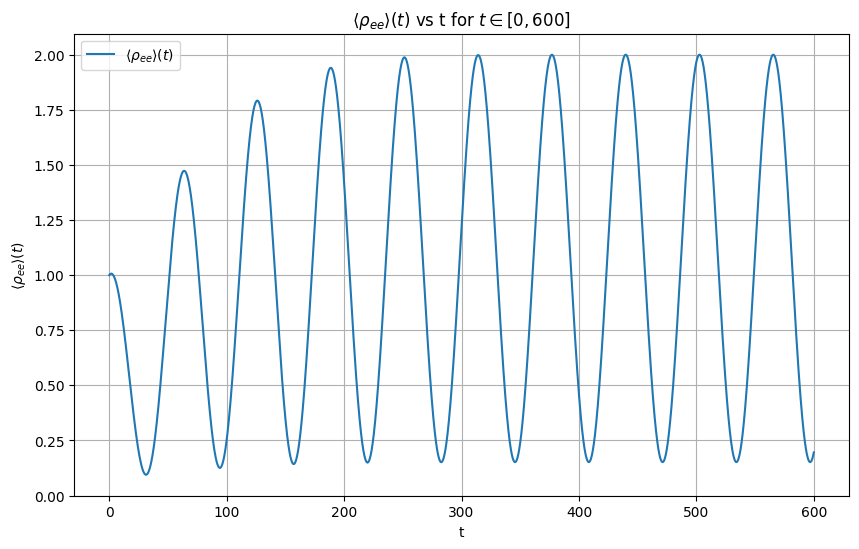

In [183]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps

# Given parameters
v = 0.5
theta_vac = 37 * np.pi / 180  # convert to radians
omega_vac = 0.1
sigma = 50

# Define the initial electron density distribution (Gaussian profile)
def rho_ee_t0(x):
    return np.exp(-x**2 / (2 * sigma**2))

# Define the final expression for rho_ee
def rho_ee(t, z):
    z_shifted = z - v * (t)
    rho_initial = rho_ee_t0(z_shifted)
    oscillation_term = 1 - np.sin(2 * theta_vac)**2 * np.sin((omega_vac * t) / 2)**2
    return rho_initial * oscillation_term

# Define the range for t and z
t_values = np.linspace(0, 600, 10000)
z_values = np.linspace(0, 600, 1000)
z_min = 0
z_max = 600

# Calculate the normalization factor for t0
rho_ee_t0_values = rho_ee(0, z_values)
normalization_factor = simps(rho_ee_t0_values, z_values)

# Calculate <rho_ee>(t)
rho_ee_avg_values = []

for t in t_values:
    rho_ee_values = rho_ee(t, z_values)
    rho_ee_avg = simps(rho_ee_values, z_values) / normalization_factor
    rho_ee_avg_values.append(rho_ee_avg)

# Plot <rho_ee>(t)
plt.figure(figsize=(10, 6))
plt.plot(t_values, rho_ee_avg_values, label=r'$\langle \rho_{ee} \rangle (t)$')
plt.xlabel('t')
plt.ylabel(r'$\langle \rho_{ee} \rangle (t)$')
plt.title(r'$\langle \rho_{ee} \rangle (t)$ vs t for $t \in [0, 600]$')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
            // 描述速度 z 分量的distribution。在一维模型中，等同於angular distribution.
            // Note: g(...) Returns Gaussian angular destribution. 
            G0->G[idx(i, j)] = g(vz[i], 1.0, signu);
            G0->bG[idx(i, j)] = alpha * g(vz[i], 1.0, sigbnu);

            // 設置spatial distribution
            double gaussian = gauss(Z[j], 0, 50);